In [5]:
from numpy import *
import matplotlib.pyplot as plt

# Problem 1

This is an first-order ordinary differential equation.

$$\frac{dx}{dt} = f(x,t) = -t x^2$$

## (a) Taylor series method of order 2

As defined in lecture, Taylor series method of order 2 is the same as Euler's method.  There is no need for a loop if all we need is a single step.

In [2]:
# Euler's method (first order)

def f(t, x):
    return -t * pow(x,2)

# Set initial values
t = 0.
x = 2.

h = -0.2
x = x + h * f(t, x)
print("x(-0.2) = %.2f" % x)

x(-0.2) = 2.00


## (b) Runge-Kutta method of order 2

In [3]:
def f(t, x):
    return -t * pow(x,2)

# Set initial values
t = 0.
x = 2.

h = -0.2

k1 = h * f(t, x)
k2 = h * f(t + h/2., x + k1/2.)
x = x + k2
print("x(-0.2) = %.2f" % x)

x(-0.2) = 1.92


# Problem 2

Given this differential equation for $p$, we can write the following differential equation for $v$:

$$\frac{dv}{dt} = \frac{1}{m} \frac{dp}{dt} = \frac{1}{m} (mg - kv^2) = g - \frac{k}{m}v^2$$

## (a) Numerical solution

The adaptive step size can be changed for every step, in order to obtain 4 significant figures of accuracy at each point.  That corresponds to a relative accuracy of $10^{-5}$ in the calculation of each change in $v$.  Since we are not asked for the position, we will treat this as a single equation, and not part of a system.

Our convention will be that $g>0$, so that the calculated $v$ will actually be the **downward** velocity.

We will use the implementation of the Adams-Bashforth-Moulton method shown in lecture.  This method calculates the errors for each step.

31.185401803566023


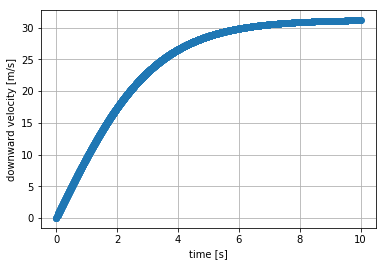

In [6]:
#   Initialization
a = 0.
b = 10.
tolerance = 1.0E-5
n = 100

vv=[]
tt=[]

v = 0.
t = a
h = (b-a)/n
hmin = h/64.
hmax = h*64.                # min max step sizes

j=0
jj=0

def f(t, v):
    g = 9.80
    m = 1e-02
    k = 1e-04
    return (g - k/m * pow(v,2))
    
while (t < b):
    vv.append(v)
    tt.append(t)

    # Loop over time
    if ( (t + h) > b ):
        h = b - t                 # Last step
    k1 = h * f(t, v)
    k2 = h * f(t + h/4, v + k1/4)
    k3 = h * f(t + 3*h/8, v + 3*k1/32 + 9*k2/32)
    k4 = h * f(t + 12*h/13, v + 1932*k1/2197 - 7200*k2/2197. + 7296*k3/2197)
    k5 = h * f(t + h, v + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
    k6 = h * f(t + h/2, v - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 -11*k5/4)
    err = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50. +2*k6/55)
    delta_v = 25*k1/216. + 1408*k3/2565. + 2197*k4/4104. - k5/5.
    if (err < tolerance or h <= 2*hmin ):
        # Accept step size
        v = v + delta_v
        t = t + h 
        j = j + 1  
      
    if (err==0):
        s = 0                                   # Trap division by 0
    else:
        s = 0.84*pow(tolerance*h/err, 0.25)
    if ( s  <  0.75 and h > 2*hmin ):
        h /= 2.                                 # Reduce step
    else:
        if ( s > 1.5 and 2* h  <  hmax ):
            h *= 2.                             # Increase step

print(vv[-1])
plt.plot(tt,vv,'o')
plt.xlabel('time [s]')
plt.ylabel('downward velocity [m/s]')
plt.grid()
plt.show()

We can see in this plot that the "terminal velocity" is just above 30 m/s.

## (b) Analytic result with $k=0$

If $k=0$ (no drag force), then 

$$\frac{dp}{dt} = mg$$

We can simply integrate this differential equation to obtain 

$$v(t) = \frac{1}{m} p(t) = \frac{1}{m} \int mg\ dt = gt$$

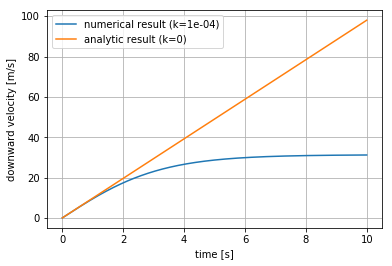

In [7]:
g = 9.80
plt.plot(tt, vv, label='numerical result (k=1e-04)')
plt.plot(tt, g* array(tt), label='analytic result (k=0)')
plt.xlabel('time [s]')
plt.ylabel('downward velocity [m/s]')
plt.grid()
plt.legend()
plt.show()

With the drag force, the downward velocity reaches a terminal velocity just over 30 m/s.
In fact, the exact terminal velocity should given by $mg = kv^2$ or $v = \sqrt{mg/k} = 31.30$ m/s.

# Problem 3

## (a) Oscillations in non-harmonic potentials

With potentials of the general form $V(x) = \frac{1}{p} kx^p$, the equation of motion for the system is 
$$\frac{d^2 x}{dt^2} = \frac{1}{m} F(x) = -\frac{k}{m}x^{p-1}$$

This second-order equation can be converted to 
$$\begin{align}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= -\frac{k}{m}x^{p-1}
\end{align}$$

We will set $y^{(0)} = x$ and $y^{(1)} = v$.

The initial conditions are set to
$$\begin{cases}
y^{(0)} (t=0) = x(0) = 2.0 \\
y^{(1)} (t=0) = v(0) = 0.0 
\end{cases}$$

These set the energy of the system, which should be conserved.  If you find that energy is not conserved, your step size $h$ is probably too small, and it is cutting the corners of the function.

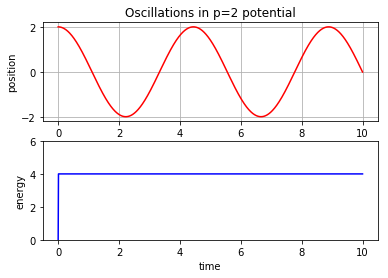

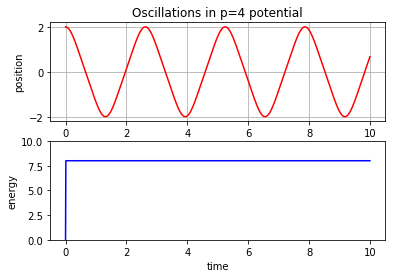

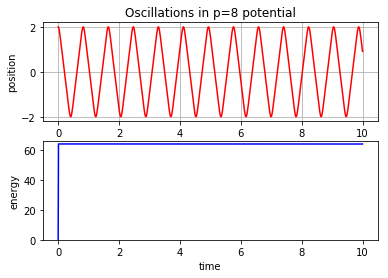

In [8]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

#   Initialization
a = 0.
b = 10.
n = 1000                                        
ydumb = np.zeros(2)
y = np.zeros(2)
tt=np.zeros(n+2)
yy1=np.zeros(n+2)
yy2=np.zeros(n+2)
ee=np.zeros(n+2)
fReturn = np.zeros(2)
k1 = np.zeros(2)
k2 = np.zeros(2)
k3 = np.zeros(2)
k4 = np.zeros(2)
y[0] = 2. 
y[1] = 0.
t = a
tt[0]=t
yy1[0]=y[0]
yy2[0]=y[1]
h = (b-a)/n

k = 2.
m = 1.

def f( t, y, p, fReturn ):
    fReturn[0] = y[1]
    fReturn[1] = -k/m * pow(y[0],p-1)

def energy(y, p):
    kinetic = 0.5 * m * pow(y[1],2)
    potential = 1./p * k * pow(y[0],p)
    return kinetic+potential

def calculate_and_plot_oscillations(p):
    y[0] = 2. 
    y[1] = 0.
    t = a
    yy1[0]=y[0]
    yy2[0]=y[1]
    tt[0]=t
    h = (b-a)/n
    j = 0
    while (t < b):                                                            # Time loop
        if ( (t + h) > b ): 
            h = b - t                                         # Last step
        f(t, y, p, fReturn)                              # Evaluate RHS's, return in fReturn
        k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
        for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
        f(t + h/2., ydumb, p, fReturn) 
        k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
        for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
        f(t + h/2., ydumb, p, fReturn)
        k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
        for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
        f(t + h, ydumb, p, fReturn) 
        k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
        for i in range(0, 2): 
            y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  
        yy2[j]=y[1]
        ee[j] = energy(y,p)

    plt.figure(1)                         
    plt.subplot(2,1,1) 
    plt.plot(tt,yy1,'r') 
    plt.grid(True)
    plt.title('Oscillations in p=%d potential' % p)
    plt.xlabel('time')
    plt.ylabel('position')
    plt.subplot(2,1,2)
    plt.ylim(0.,ee[1]+2)
    plt.plot(tt,ee,'b')
    plt.xlabel('time')
    plt.ylabel('energy')
    plt.show()

calculate_and_plot_oscillations(2)
calculate_and_plot_oscillations(4)
calculate_and_plot_oscillations(8)


We see that the oscillations for higher $p$ values are sharper and more linear between the turning points.  This is what we expect -- the particles are roughly free in the center of a higher-order potential.

Energy is clearly conserved for all of the $p$ values.

## (b) Oscillation period

The key to finding the oscillation period is finding the zero-crossing times.  A standard way to do this is to find the step where the position value $y[0]$ changes sign.  That is, the product of the positions before and after the zero-crossing step will be negative.

We define the period as the difference between the first and third crossing times.

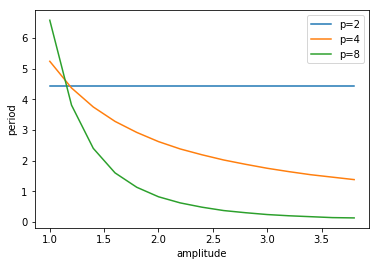

In [9]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

#   Initialization
a = 0.
b = 10.
n = 1000                                        
ydumb = np.zeros(2)
y = np.zeros(2)
tt=np.zeros(n+2)
yy1=np.zeros(n+2)
yy2=np.zeros(n+2)
crossing_times=[]
fReturn = np.zeros(2)
k1 = np.zeros(2)
k2 = np.zeros(2)
k3 = np.zeros(2)
k4 = np.zeros(2)
y[0] = 2. 
y[1] = 0.
t = a
tt[0]=t
yy1[0]=y[0]
yy2[0]=y[1]
h = (b-a)/n

k = 2.
m = 1.

def f( t, y, p, fReturn ):
    fReturn[0] = y[1]
    fReturn[1] = -k/m * pow(y[0],p-1)

def calculate_and_plot_period(y0, p):
    y[0] = y0 
    y[1] = 0.
    t = a
    yy1[0]=y[0]
    yy2[0]=y[1]
    tt[0]=t
    h = (b-a)/n
    crossing_times=[]
    j = 0
    while (t < b):                                                            # Time loop
        if ( (t + h) > b ): 
            h = b - t                                         # Last step
        f(t, y, p, fReturn)                              # Evaluate RHS's, return in fReturn
        k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
        for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
        f(t + h/2., ydumb, p, fReturn) 
        k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
        for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
        f(t + h/2., ydumb, p, fReturn)
        k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
        for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
        f(t + h, ydumb, p, fReturn) 
        k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
        for i in range(0, 2): 
            y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
        if (y[0]*yy1[j] < 0):
            crossing_times.append(t)
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  
        yy2[j]=y[1]
    period = crossing_times[2]-crossing_times[0]
    
    return period

amplitudes = []
periods_p2 = []
periods_p4 = []
periods_p8 = []
for amplitude in arange(1., 4., 0.2):
    amplitudes.append(amplitude)
    periods_p2.append(calculate_and_plot_period(amplitude, 2))
    periods_p4.append(calculate_and_plot_period(amplitude, 4))
    periods_p8.append(calculate_and_plot_period(amplitude, 8))

plt.plot(amplitudes, periods_p2, label='p=2')
plt.plot(amplitudes, periods_p4, label='p=4')
plt.plot(amplitudes, periods_p8, label='p=8')
plt.legend()
plt.xlabel('amplitude')
plt.ylabel('period')
plt.show()


We can see that only the $p=2$ harmonic oscillator has a period independent of the amplitude.  For higher $p$ values, the period decreases as the amplitude is increased.  The reason is that the particle actually moves faster across the potential when the amplitude is increased.

# Problem 4

The potential is now fixed to $p=2$, and the external driving force is set to an arbitrary $\omega$.

The new equation of motion for the system is 
$$\frac{d^2 x}{dt^2} = \frac{1}{m} F(x) = -\frac{k}{m}x^{p-1} + \frac{F_0}{m} \sin\omega t$$

This second-order equation can be converted to 
$$\begin{align}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= -\frac{k}{m}x^{p-1} + \frac{F_0}{m} \sin\omega t
\end{align}$$

The initial conditions are again set to
$$\begin{cases}
y^{(0)} (t=0) = x(0) = 2.0 \\
y^{(1)} (t=0) = v(0) = 0.0 
\end{cases}$$

## (a) Case of large driving force amplitude $F_0$

We will first plot the oscillations with $F_0=0$ (no driving force), and then plot the oscillations with a very large $F_0$ (500 arbitrary units).

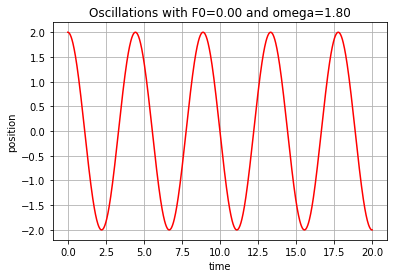

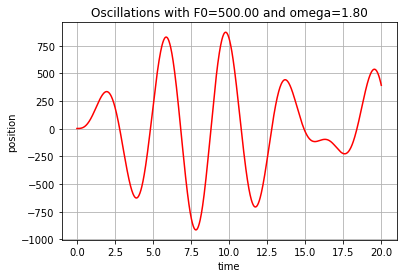

In [10]:
#   Initialization
a = 0.
b = 20.
n = 1000                                        
ydumb = np.zeros(2)
y = np.zeros(2)
tt=np.zeros(n+2)
yy1=np.zeros(n+2)
yy2=np.zeros(n+2)
fReturn = np.zeros(2)
k1 = np.zeros(2)
k2 = np.zeros(2)
k3 = np.zeros(2)
k4 = np.zeros(2)
y[0] = 2. 
y[1] = 0.
t = a
tt[0]=t
yy1[0]=y[0]
yy2[0]=y[1]
h = (b-a)/n

k = 2.
m = 1.

def f(t, y, p, F0, omega, fReturn):
    fReturn[0] = y[1]
    fReturn[1] = -k/m * pow(y[0],p-1) + F0/m * sin(omega*t)

def calculate_and_plot_oscillations(p, F0, omega):
    y[0] = 2. 
    y[1] = 0.
    t = a
    yy1[0]=y[0]
    yy2[0]=y[1]
    tt[0]=t
    h = (b-a)/n
    j = 0
    while (t < b):                                                            # Time loop
        if ( (t + h) > b ): 
            h = b - t                                         # Last step
        f(t, y, p, F0, omega, fReturn)                              # Evaluate RHS's, return in fReturn
        k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
        for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
        f(t + h/2., ydumb, p, F0, omega, fReturn) 
        k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
        for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
        f(t + h/2., ydumb, p, F0, omega, fReturn)
        k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
        for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
        f(t + h, ydumb, p, F0, omega, fReturn) 
        k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
        for i in range(0, 2): 
            y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  
        yy2[j]=y[1]

    plt.plot(tt,yy1,'r') 
    plt.grid(True)
    plt.title('Oscillations with F0=%.2f and omega=%.2f' % (F0, omega))
    plt.xlabel('time')
    plt.ylabel('position')
    plt.show()

calculate_and_plot_oscillations(2, 0., 1.8)
calculate_and_plot_oscillations(2, 500., 1.8)


In the top plot, the oscillations occur at the natural frequency of the system, $\sqrt{k/m} = \sqrt{2}$ rad/s, for a period of 4.4 s.

With large $F_0$, it's not suprising that the oscillations are dominated by the driving force, and the frequency is that of the driving force ($\omega=1.8$ rad/s).  (It helps to make the driving force frequency significantly different from the natural frequency $\sqrt{k/m}$, so that the effect is more visible.)

Note that in the second plot we can already see the beating between the natural frequency and the driving frequency.

## (b) Beat frequency

To reveal the beat frequency, we expect that $F_0$ should be on the same order as the restoring force amplitude $k/m$.  If it is too large, the driving force will dominate; too small, and the driving frequency of 1.8 rad/s will not be visible.  A good choice seems to be $F_0=4.0$.

The natural frequency of the system is $\omega_0 = \sqrt{\frac{k}{m}} = 1.41\,\text{rad/s}$ for our choice of $k=2$, $m=1$.  This matches the measured period of 4.44 s.

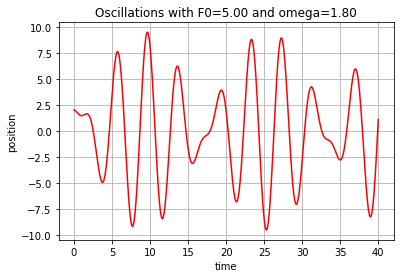

In [11]:
a = 0.
b = 40.
calculate_and_plot_oscillations(2, 5., 1.8)

The beating has a period of between 15 and 16 seconds, corresponding to a frequency of about 0.064 Hz.

The expected beat frequency is 
$$ \frac{\omega-\omega_0}{2\pi} = \frac{1.80 - 1.41}{2\pi} = 0.062$$

This matches the observed beating.

## (c) Amplitude vs. driving frequency

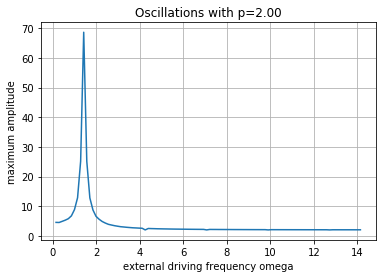

In [12]:
a = 0.
b = 40.
def find_maximum_amplitude(p, F0, omega):
    y[0] = 2. 
    y[1] = 0.
    t = a
    yy1[0]=y[0]
    yy2[0]=y[1]
    tt[0]=t
    h = (b-a)/n
    j = 0
    while (t < b):                                                            # Time loop
        if ( (t + h) > b ): 
            h = b - t                                         # Last step
        f(t, y, p, F0, omega, fReturn)                              # Evaluate RHS's, return in fReturn
        k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
        for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
        f(t + h/2., ydumb, p, F0, omega, fReturn) 
        k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
        for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
        f(t + h/2., ydumb, p, F0, omega, fReturn)
        k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
        for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
        f(t + h, ydumb, p, F0, omega, fReturn) 
        k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
        for i in range(0, 2): 
            y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  
        yy2[j]=y[1]
        
    maximum_amplitude = max(abs(yy1))
    #print('for omega =', omega, ', max amp. is ', maximum_amplitude)
    return maximum_amplitude

p = 2.
omega_values = []
max_amplitude_values = []
omega_0 = sqrt(2)
for omega in linspace(omega_0/10., omega_0*10, 100): 
    omega_values.append(omega)
    max_amplitude_values.append(find_maximum_amplitude(p, 5., omega))

plt.plot(omega_values,max_amplitude_values) 
plt.grid(True)
plt.title('Oscillations with p=%.2f' % (p))
plt.xlabel('external driving frequency omega')
plt.ylabel('maximum amplitude')    
plt.show()

It is not surprising to see a strong resonance for $\omega\approx\omega_0$.  This is what we expect from a driven harmonic oscillator ($p=2$).

## (d) Non-linear system

With $p=4$, I found that retuning $F_0$ to $F_0=1.5$ showed good beating behavior for $\omega\approx\omega_0$, indicating that there was a balance between the restoring force and the external force.  The plot below uses that value of $F_0$.

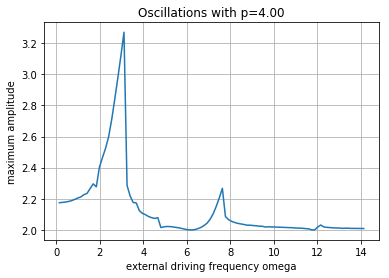

In [13]:
p = 4.
omega_values = []
max_amplitude_values = []
omega_0 = sqrt(2)
for omega in linspace(omega_0/10., omega_0*10, 100): 
    omega_values.append(omega)
    max_amplitude_values.append(find_maximum_amplitude(p, 1.5, omega))

plt.plot(omega_values,max_amplitude_values) 
plt.grid(True)
plt.title('Oscillations with p=%.2f' % (p))
plt.xlabel('external driving frequency omega')
plt.ylabel('maximum amplitude')    
plt.show()


With the non-linear system ($p=4$), we do not see as strong an amplitude enhancement at the natural frequency.  (Remember that the natural frequency is in fact amplitude-dependent, as seen in Problem 3.)
We also do not see the die-off in the resonance curve; in fact, there are secondary resonances at higher frequencies.
